In [1]:
print("hello")

hello



0: 640x640 3 military_tanks, 14.3ms
1: 640x640 1 military_tank, 14.3ms
2: 640x640 1 military_tank, 14.3ms
3: 640x640 1 military_truck, 14.3ms
4: 640x640 1 military_truck, 14.3ms
Speed: 1.6ms preprocess, 14.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
None
tensor([[5.2502e+01, 2.7992e+02, 1.1219e+03, 6.1064e+02, 9.4833e-01, 0.0000e+00],
        [1.2007e+02, 2.0250e+02, 5.6487e+02, 3.5399e+02, 9.4800e-01, 0.0000e+00],
        [4.9209e+02, 1.7277e+02, 8.6116e+02, 2.8086e+02, 9.4709e-01, 0.0000e+00]], device='cuda:0')


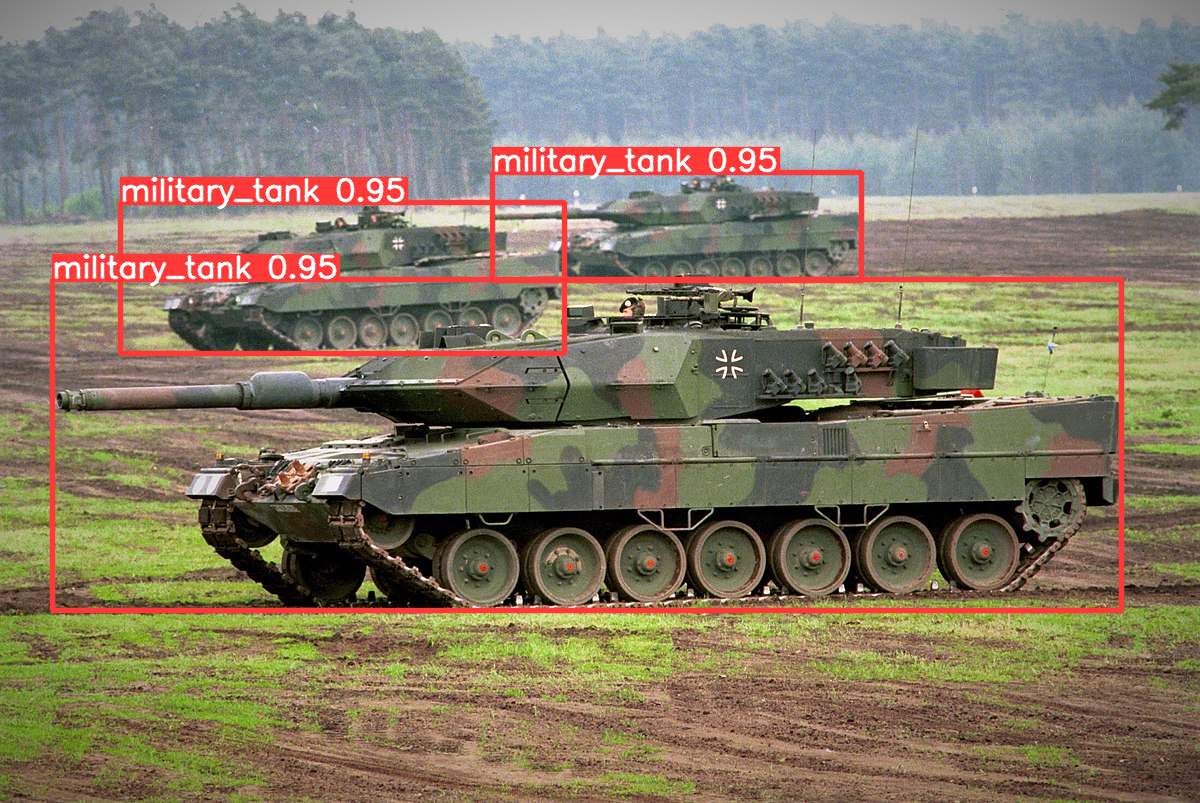

None
tensor([[2.5745e+02, 1.3932e+02, 1.1897e+03, 5.4078e+02, 9.4582e-01, 0.0000e+00]], device='cuda:0')


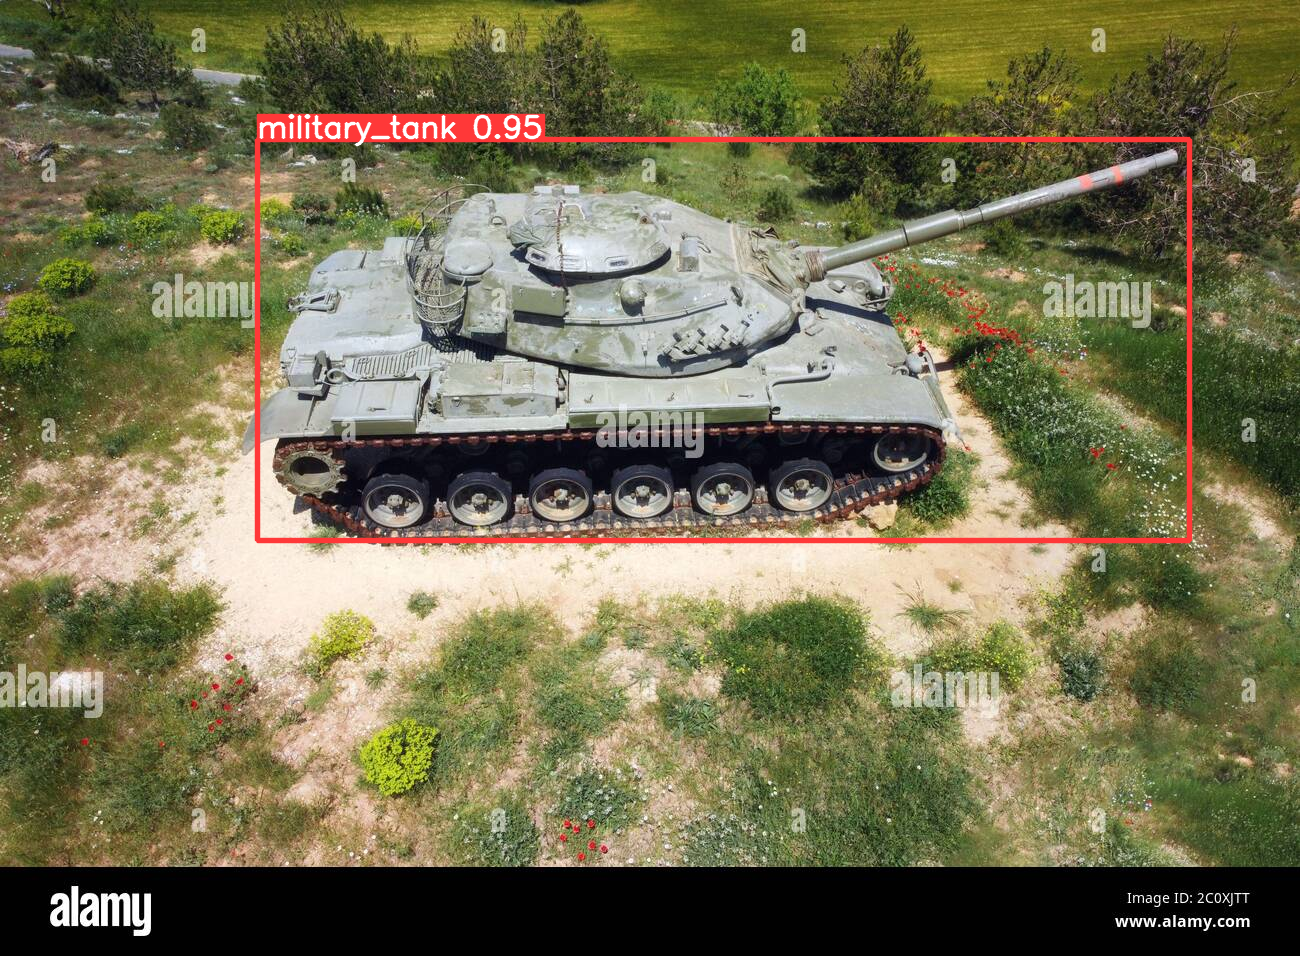

None
tensor([[ 37.9422,  49.1085, 267.8605, 126.8100,   0.8674,   0.0000]], device='cuda:0')


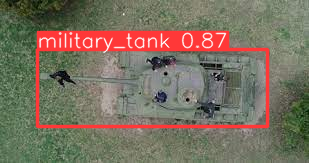

None
tensor([[7.1230e+02, 3.5369e+02, 1.2997e+03, 7.3371e+02, 3.2914e-01, 1.0000e+00]], device='cuda:0')


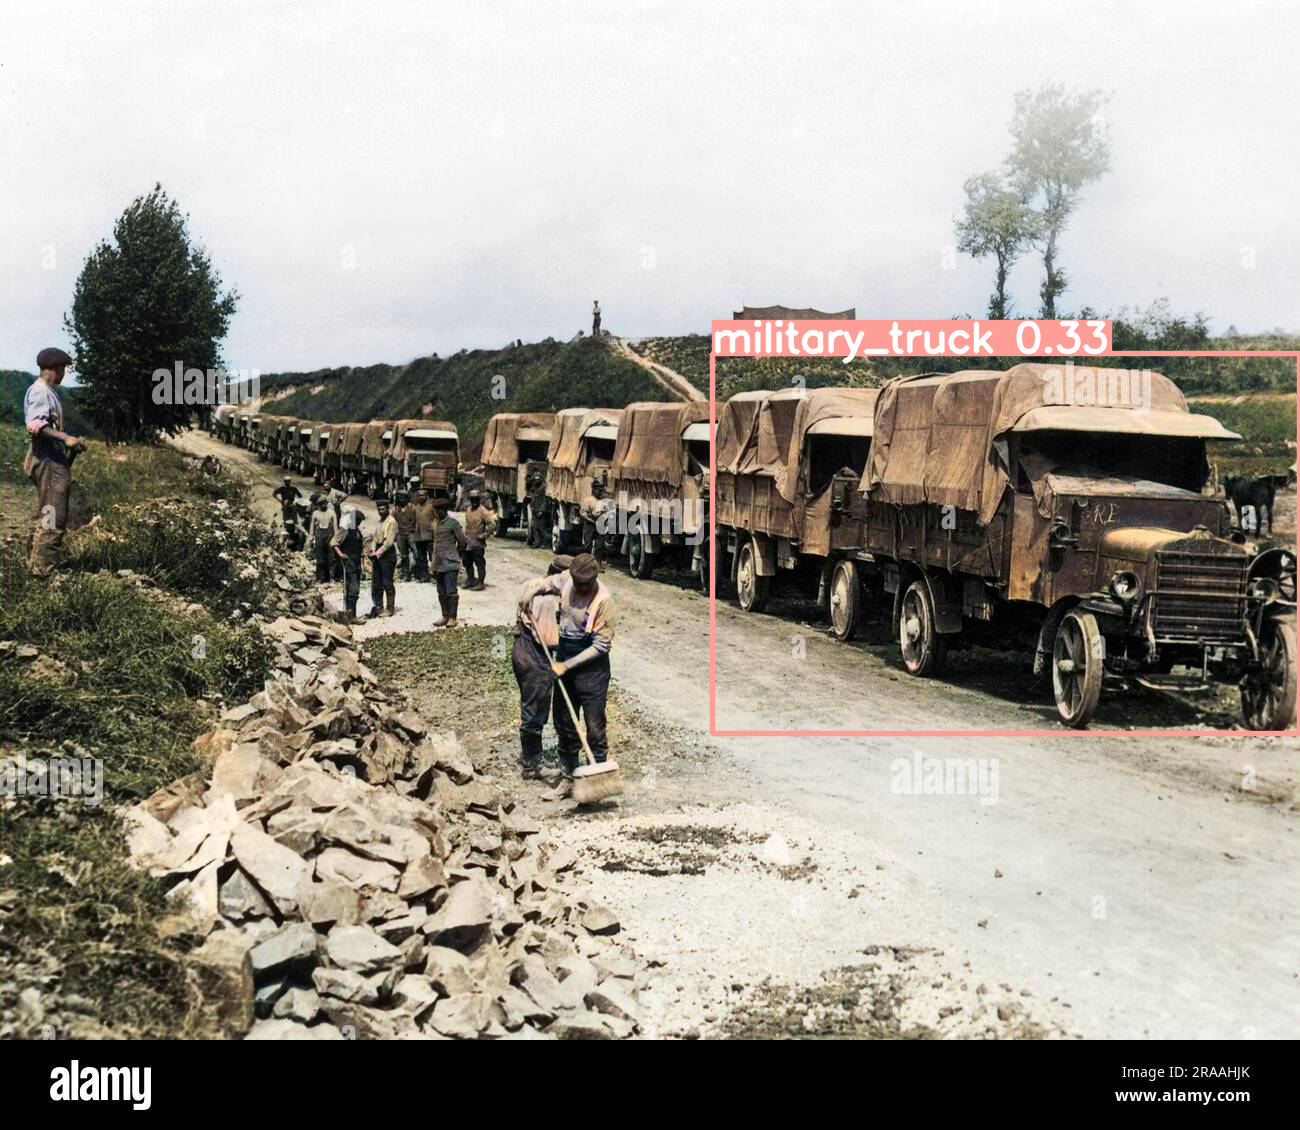

None
tensor([[ 27.6920,  47.9831, 286.1937, 179.0642,   0.9512,   1.0000]], device='cuda:0')


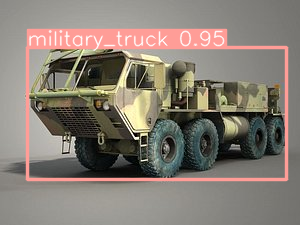

In [30]:
from ultralytics import YOLO

model = YOLO("../apps/models/best_tanks_militaryTrucks.pt")

results = model(["media/tank_test.jpg","media/tank_test_2.jpg","media/tank_test_3.jpg","media/military_truck_test.jpg","media/military_truck_test_2.jpg"])

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    print(probs)
    print(boxes.data)
    result.show()  # display to screen
    result.save(filename='result.jpg')

In [50]:
for result in results:
    objects_detected = result.boxes.data
    for object in objects_detected:
        print(float(object[5]))

0.0
0.0
0.0
0.0
0.0
1.0
1.0


In [54]:
model.names

{0: 'military_tank', 1: 'military_truck'}

In [45]:
results[0].boxes.data[0][5]

tensor(0., device='cuda:0')

In [38]:
float(results[0].boxes.data[0][4])

0.9483316540718079

In [43]:
float(results[4].boxes.data[0][5])

1.0

In [26]:
print(probs)

None


In [23]:
result.names

{0: 'military_tank', 1: 'military_truck'}

In [7]:
boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1.], device='cuda:0')
conf: tensor([0.9512], device='cuda:0')
data: tensor([[ 27.6920,  47.9831, 286.1937, 179.0642,   0.9512,   1.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (225, 300)
shape: torch.Size([1, 6])
xywh: tensor([[156.9428, 113.5236, 258.5017, 131.0811]], device='cuda:0')
xywhn: tensor([[0.5231, 0.5045, 0.8617, 0.5826]], device='cuda:0')
xyxy: tensor([[ 27.6920,  47.9831, 286.1937, 179.0642]], device='cuda:0')
xyxyn: tensor([[0.0923, 0.2133, 0.9540, 0.7958]], device='cuda:0')

In [9]:
def get_np_image_size(image):
    if image.ndim == 3:  # Color image
        height, width, channels = image.shape
    elif image.ndim == 2:  # Grayscale image
        height, width = image.shape
        channels = 1  # Grayscale image has 1 channel
    else:
        raise ValueError("Unsupported image dimensions")
    
    return width, height

def xywh2xiyi(xywh, img_w, img_h):
    x1 = y1 = x2 = y2 = x3 = y3 = x4 = y4 = 0

    if isinstance(xywh, torch.Tensor):
        x_center = float(xywh[0, 0])
        y_center = float(xywh[0, 1])
        width = float(xywh[0, 2])
        height = float(xywh[0, 3])

        # Convert relative coordinates to absolute coordinates
    x1 = int((x_center - width / 2) * img_w)
    y1 = int((y_center - height / 2) * img_h)
    x2 = int((x_center + width / 2) * img_w)
    y2 = int((y_center - height / 2) * img_h)
    x3 = int((x_center + width / 2) * img_w)
    y3 = int((y_center + height / 2) * img_h)
    x4 = int((x_center - width / 2) * img_w)
    y4 = int((y_center + height / 2) * img_h)

    bounds = {
        "bounds": {
            "x1": x1,
            "y1": y1,
            "x2": x2,
            "y2": y2,
            "x3": x3,
            "y3": y3,
            "x4": x4,
            "y4": y4
        }
    }

    return bounds

In [11]:
img = results[0].orig_img
img_w, img_h = get_np_image_size(img)
img_w

1200

In [12]:
boxes = [b.xywh for b in results[0].boxes]
confidences = [b.conf for b in results[0].boxes]
class_ids = [b.id for b in results[0].boxes if b.id]
class_names = []

In [15]:
class_ids

[]

In [32]:
import torch
objects = []
for i, box in enumerate(boxes):
    obj = xywh2xiyi(box, img_w, img_h) # returns dict of bounds: x1 y1, .... x4 y4
    obj["confidence"] = float(confidences[i])
    obj["tagName"] = box.data[0][5]
    objects.append(obj)
    

UnboundLocalError: local variable 'x_center' referenced before assignment

In [21]:

resDicts = {}
resDicts["objects"] = objects
resDicts["all_classes"] = class_ids



In [22]:
resDicts

{'objects': [{'bounds': {'x1': 63002,
    'y1': 224777,
    'x2': 1346315,
    'y2': 224777,
    'x3': 1346315,
    'y3': 490344,
    'x4': 63002,
    'y4': 490344},
   'confidence': 0.9483316540718079,
   'tagName': 'TO DO'},
  {'bounds': {'x1': 144083,
    'y1': 162604,
    'x2': 677842,
    'y2': 162604,
    'x3': 677842,
    'y3': 284255,
    'x4': 144083,
    'y4': 284255},
   'confidence': 0.9480031728744507,
   'tagName': 'TO DO'},
  {'bounds': {'x1': 590510,
    'y1': 138731,
    'x2': 1033386,
    'y2': 138731,
    'x3': 1033386,
    'y3': 225530,
    'x4': 590510,
    'y4': 225530},
   'confidence': 0.9470905065536499,
   'tagName': 'TO DO'}],
 'all_classes': []}